This notebook briefly explains [minmax linkage](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4527350/) in hierarchical clustering and it provides a naive implementation 

# What is min-max linkage?

A minmax radius of cluster can be defined as: <br>
$r(C) = \min_{x \in C} {d_{max}(x,C)}$

In other words, for each observation in the cluster $C$, its distance to its furthest neighbor is calculated. Then, among the calculated distances for all observations in $C$, its minimum is considered as its radius.

Note that a (closed) ball of radius $r(C)$ centered at the prototype covers all of C. 

Now, the minimax linkage between two clusters G and H is defined as follows: <br>
$d(G,H) = r(G \cup H)$

# Naive Implementation

In [58]:
#Importing Libraries

from sklearn.metrics import pairwise_distances
import copy
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [59]:
def agglemorative_clustering_minmax(X, affinity='euclidean', n_clusters=2):
    """
    X: array-like, shape (n_samples, n_features) or (n_samples, n_samples)
    
    affinity: "precomputed" or "euclidean" (default) 
    Metric used to compute the distance between any two samples
    
    n_clusters: int, default=2
    The number of clusters to find. 
    """
    
    #calculating distance matrix D
    if affinity=="precomputed":
        D = copy.deepcopy(X)
    elif affinity=="euclidean":
        D =  pairwise_distances(X)
        
    
    #create a copy of D to update 
    D_to_update = copy.deepcopy(D)
    
    #initial number of clusters equals to number of samples
    n_samples = np.shape(X)[0] 
     
    groups = {}
    for idx in range(n_samples):
        groups[idx] = [idx]
        
    
    #after deleting two groups, we will add a new group in the dictionary with new key (see iteration below) 
    #to make sure the new key is different than the previous ones, we just start with n_samples
    new_key = n_samples
    
    
    #iteration to find clusters
    k = n_samples #initial number of clusters
    while k > n_clusters:
        #print('k>>> ', k)
        groups_keys = list(groups.keys())
        
        #filling diagonal with large value
        np.fill_diagonal(D_to_update, float('inf'))
        
        D_1NN = np.min(D_to_update, axis=1)
        D_1NN_idx = np.argmin(D_to_update, axis=1)
        
        C_i = np.argmin(D_1NN)
        C_j = D_1NN_idx[C_i]
        
        key_i = groups_keys[C_i]
        key_j = groups_keys[C_j]
        
        #after finding the two set of cluster, we are going to update the distance matrix 
        #we add a new row and column to the end of matrix 
        # we remove the i-th and j-th groups
        #and calculate the distance between the new cluster and others
        
        groups[new_key] = groups[key_i]
        groups[new_key].extend(groups[key_j])
        del groups[key_i]
        del groups[key_j]
        
        
        D_to_update = np.delete(D_to_update, [C_i, C_j], axis=0)
        D_to_update = np.delete(D_to_update, [C_i, C_j], axis=1)
        
        D_new = np.zeros((k-1,k-1))
        D_new[:-1,:-1] = D_to_update
        for idx_key, key in enumerate(groups.keys()):
            obs_lst = groups[new_key][:]
            obs_lst.extend(groups[key])
            
            new_distance = np.min(np.max(D[np.ix_(obs_lst,obs_lst)], axis=1))
            D_new[idx_key,-1] = new_distance
            D_new[-1, idx_key] = new_distance
        
        
        #updating D_to_update 
        D_to_update = D_new
        
        
        
        #updating the current number of clusters
        k = len(groups.keys())
    
        #update the next new key:
        new_key += 1 #in the next run, use this new key
    
    return groups

# Test it on toy data:

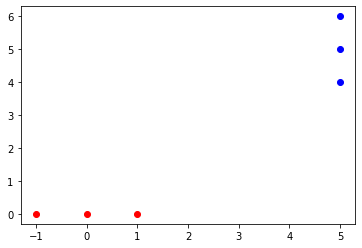

In [61]:
toy_data = np.array([[-1,0],
                     [0,0],
                     [1,0],
                     [5,4],
                     [5,5],
                     [5,6]])



sc = StandardScaler()
X = sc.fit_transform(toy_data)
clusters = agglemorative_clustering_minmax(X, affinity='euclidean', n_clusters=2)

color_of_clusters = ['r', 'b']

for idx_group, group in enumerate(clusters):
    for j in clusters[group]:
        plt.scatter(x=toy_data[j][0], y=toy_data[j][1], color=color_of_clusters[idx_group])

plt.show()